## 1. Exploratory Data Analysis
Let's check the data files! According to the data description we should find the following columns:

 - **id** - a unique identifier for each trip
 - **vendor_id** - a code indicating the provider associated with the trip record
 - **pickup_datetime** - date and time when the meter was engaged
 - **dropoff_datetime** - date and time when the meter was disengaged
 - **passenger_count** - the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude** - the longitude where the meter was engaged
 - **pickup_latitude** - the latitude where the meter was engaged
 - **dropoff_longitude** - the longitude where the meter was disengaged
 - **dropoff_latitude** - the latitude where the meter was disengaged
 - **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration** - (target) duration of the trip in seconds



## importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

* reading the data into dataframe

In [2]:
data=pd.read_csv("C:\\Users\\yasaswini\\Downloads\\nyc_taxi_trip_duration.csv")

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100


* shape and size of the data

In [5]:
df.shape

(729322, 11)

In [6]:
df.size

8022542

### checking the missing values in the data set

In [7]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

##### we dont have  any missing values in the dataset

In [8]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

#### we observe that the date and time variables are in object type so we have to convert it into datetime type

In [9]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [11]:


df['store_and_fwd_flag']=(df.store_and_fwd_flag=='Y')*1

In [12]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int32
trip_duration                  int64
dtype: object

In [13]:
df['check_duration']=(df['dropoff_datetime']-df['pickup_datetime']).map(lambda x:x.total_seconds())

In [14]:
durationdif=df[np.abs(df['check_duration'].values-df['trip_duration'].values)>1]

In [15]:



durationdif.shape

(0, 12)

### Target exploration

In [16]:
df['trip_duration'].describe()

count    7.293220e+05
mean     9.522291e+02
std      3.864626e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.630000e+02
75%      1.075000e+03
max      1.939736e+06
Name: trip_duration, dtype: float64

In [17]:
df['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

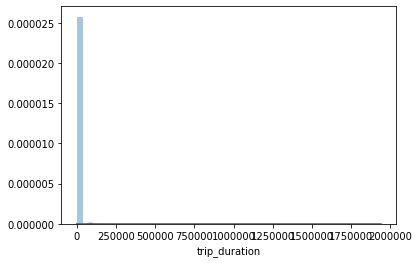

In [18]:
sns.distplot(df['trip_duration'])
plt.show

we transform the above data into log function since it is not giving much sense

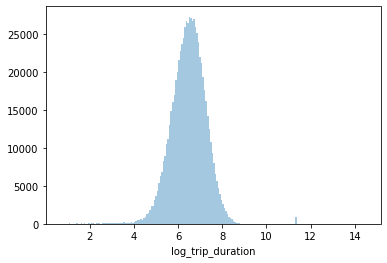

In [19]:
df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['log_trip_duration'], kde = False, bins = 200)
plt.show()

Text(0, 0.5, 'Frequency')

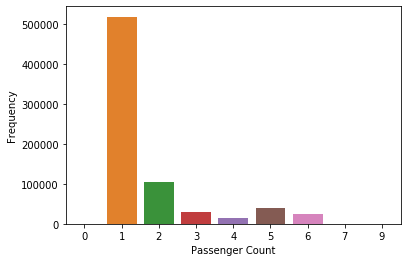

In [20]:
sns.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')


###### from the above plot  we observe that most of the trips are with one passengers and there are 7to 9 passengers in trip but very less in amount

Text(0, 0.5, 'Frequency')

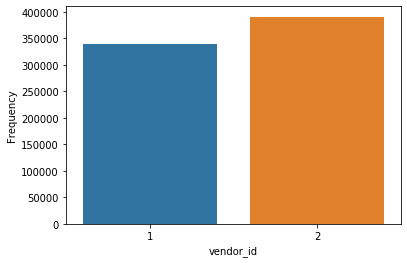

In [21]:
sns.countplot(df['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')


###### vendor 2 has more trips when compared to the vendor 1

Text(0, 0.5, 'Frequency')

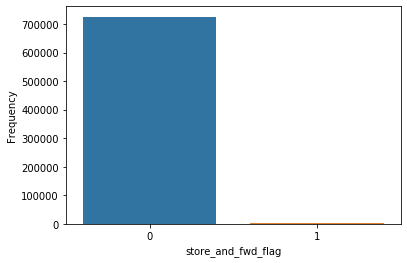

In [22]:
sns.countplot(df['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

 ###### show that there was almost no storing taking place

### lets check on which day and what time the pickups are more

In [23]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

In [24]:
df['weekday']=df['pickup_datetime'].dt.weekday
df['hour']=df['pickup_datetime'].dt.hour

Text(0, 0.5, 'pickups')

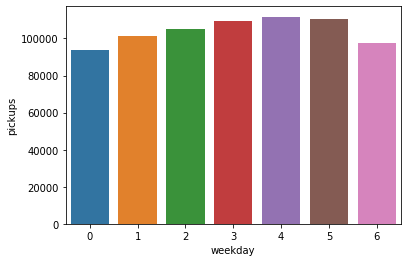

In [25]:
sns.countplot(df['weekday'])
plt.xlabel('weekday')
plt.ylabel('pickups')

###### we can observe that the number of pickups are less during the weekends and the number of pickups are more on day 4 i.e thursday


Text(0, 0.5, 'total number of pickups')

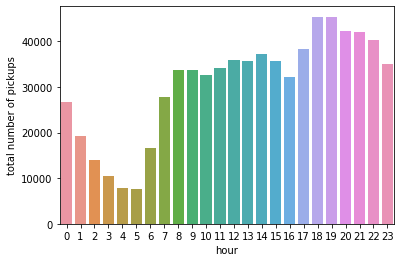

In [26]:
sns.countplot(df['hour'])
plt.xlabel('hour')
plt.ylabel('total number of pickups')

#### we observe that the number of pickups gradually reduces from 12 to 5 and more pickups are in the evenings 7 to 8

#### checking the minimum and maximum values of the latitude and longitude values

In [27]:
df['pickup_latitude'].min(),df['pickup_longitude'].min()

(34.71223449707032, -121.93334197998048)

In [28]:
df['dropoff_latitude'].min(),df['dropoff_longitude'].min()

(32.181140899658196, -121.9333038330078)

In [29]:
df['pickup_latitude'].max(),df['pickup_longitude'].max()

(51.88108444213867, -65.89738464355469)

In [30]:
df['dropoff_latitude'].max(),df['dropoff_longitude'].max()

(43.92102813720703, -65.89738464355469)

In [31]:
df = df.loc[(df.pickup_latitude > 34.7) & (df.pickup_latitude < 52)]
df = df.loc[(df.dropoff_latitude>32.1) & (df.dropoff_latitude < 44)]
df = df.loc[(df.dropoff_longitude > -122) & (df.dropoff_longitude < -66)]
df = df.loc[(df.pickup_longitude > -121) & (df.pickup_longitude < -66)]
df_new = df.copy()


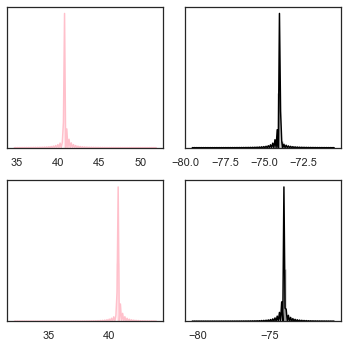

In [32]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(5, 5))
sns.distplot(df_new['pickup_latitude'].values, label = 'pickup_latitude',color="pink", ax=axes[0,0])
sns.distplot(df_new['pickup_longitude'].values, label = 'pickup_longitude',color="black", ax=axes[0,1])
sns.distplot(df_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="pink", ax=axes[1, 0])
sns.distplot(df_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="black", ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()


all the latitude points are ploted in range of 40 to 41 and the longitude points are ploted in range of -74 to -73

In [33]:
df = df.loc[(df.pickup_latitude > 40) & (df.pickup_latitude < 41)]
df = df.loc[(df.dropoff_latitude>40) & (df.dropoff_latitude < 41)]
df = df.loc[(df.dropoff_longitude > -74) & (df.dropoff_longitude < -73)]
df = df.loc[(df.pickup_longitude > -74) & (df.pickup_longitude < -73)]
df_new = df.copy()

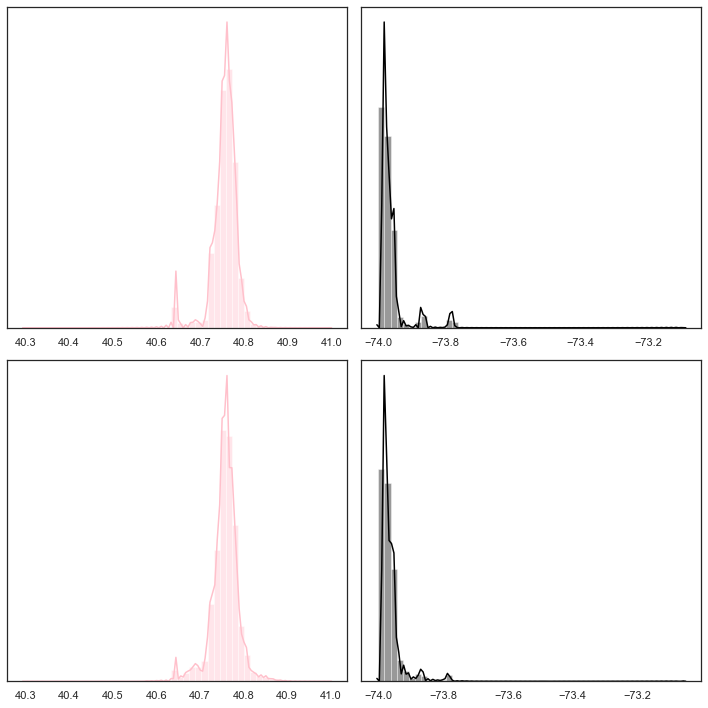

In [34]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10))
sns.distplot(df_new['pickup_latitude'].values, label = 'pickup_latitude',color="pink", ax=axes[0,0])
sns.distplot(df_new['pickup_longitude'].values, label = 'pickup_longitude',color="black" ,ax=axes[0,1])
sns.distplot(df_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="pink", ax=axes[1, 0])
sns.distplot(df_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="black", ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()


## Trip duration vs passenger count
Again as we are aware, there are a large number of outliers for trip duration and we will not be able to observe the differences. For this, we have taken a cutoff of 10000 seconds and used a boxplot.


In [35]:
df.passenger_count.value_counts()

1    403731
2     80806
5     30386
3     22721
6     18777
4     10662
0        26
9         1
Name: passenger_count, dtype: int64

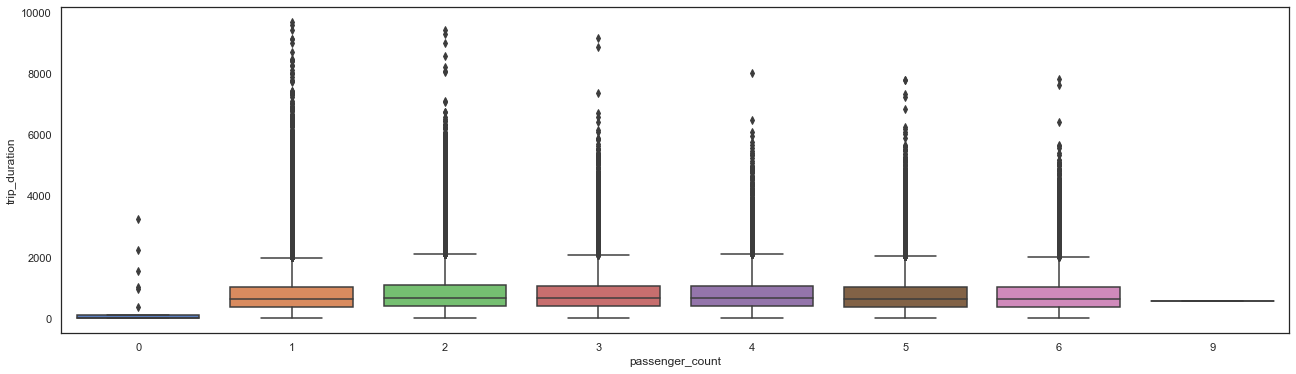

In [36]:
df.passenger_count.value_counts()
plt.figure(figsize=(22, 6))
df_sub = df[df['trip_duration'] < 10000]
sns.boxplot(x="passenger_count", y="trip_duration", data=df_sub)
plt.show()


* The boxplot clearly shows that there not much of a difference in distribution for the most frequently occuring passenger count values - 1, 2, 3.


### correlation heatmap

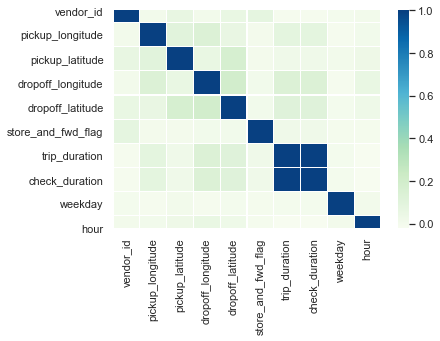

In [45]:

ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="GnBu")

### conclusion
1.1. The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5)  i.e. about 17 minutes.
2. There are several suspiciously short rides with less than 10 seconds duration.
3. Most of the trips involve only 1 passenger. There are trips with 7-9 passengers but they are very low in number.
4. Vendor 2 has more number of trips as compared to vendor 1
5. Number of pickups for weekends is much lower than week days with a peak on Thursday (4). Note that here weekday is a decimal number, where 0 is Sunday and 6 is Saturday.
6. Number of pickups as expected is highest in late evenings. However, it is much lower during the morning peak hours.
7. We see that most trips are concentrated between these lat long only with a few significant clusters. These clusters are represented by the numerous peaks in the lattitude and longitude histograms

8. Trip durations are definitely shorter for late night and early morning hours that can be attributed to low traffic density

9. The boxplot clearly shows that there not much of a difference in distribution for the most frequently occuring passenger count values - 1, 2, 3.
10. From the correlation heatmap we see that the lattitude and longitude features have higher correlation with the target as compared to the other features.